# Cluster Algorithms

## 1 Principles Introduction

Clustering is a very important machine learning technique which is able to classify data point to different categories. Due to that these data points are usually not labelled, so clustering is an unsupervised learning algorithm. The data points belonging to the same category should have similar properties or features, while data points from different categories should be with dissimilar properties. In this notebook, several commom used clustering algorithms will be introduced. 

### 1.1 K-means Algorithm

K-means is a simple and popular clustering algorithm which has been applied in many fileds. Generally speaking, in K-means, the number of group is represented by $K$. Every group has a centroid and the centroid of each will be calculated iterratively until the centroid will not change anymore. K-means algorithms usually should include following steps:
1. Initialization. Define the number of clusters as $K$ and Initialize the centroids of groups.
2. Iterate the following process until the centorid will not change.  
a) Compute the squared distance between data points and all centroids.  
b) Assign each data point to the closest cluster.  
c) Calculate the centroids of every cluster by taking the average of all the data points belonging to the cluster.  

The following figure gives an example of k-means clustering.

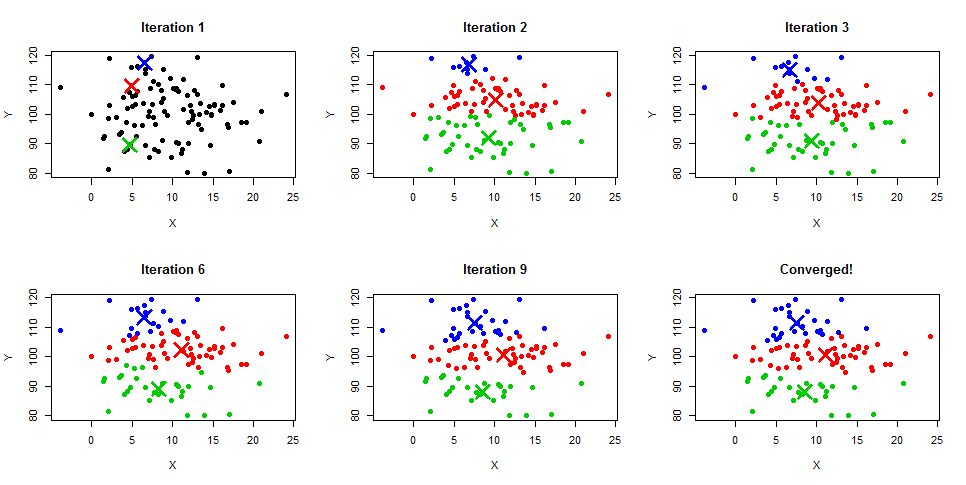

In [10]:
from IPython.display import Image
Image(filename="D:/Jupyter_space/k-means_step.png", width=800, height=800)

### 1.2 Mean shift clustering

Mean shift is an algorithm based on silding window, which attempts to find the dense areas of data points. Simply speaking, firstly kernel function would be utilzed to calculate kernel density estimation (KDE). Depending on kernal function, KDE of dataset could be different. Mean shift algorithm could be illustrated using following steps.
1. Initialize random seed and window of the kernel function.
2. Calculate the the weighted mean of the density in the search window.
3. Shift the search window to the mean that we got at step 2.
4. Repeat step 2 and step 3 until convergence.   

The weighted mean in step 2 could be calculated using the following equations:
$$m(x) = \frac{\sum_{x \in N(x)} K(x_i - x) x_i}{\sum_{x \in N(x)}  K(x_i - x)}$$
where $x$ is the initial estimate, $K(x_i - x)$ is a givern kernal fuction and $N(x)$ is the neighbor of x in the search window.

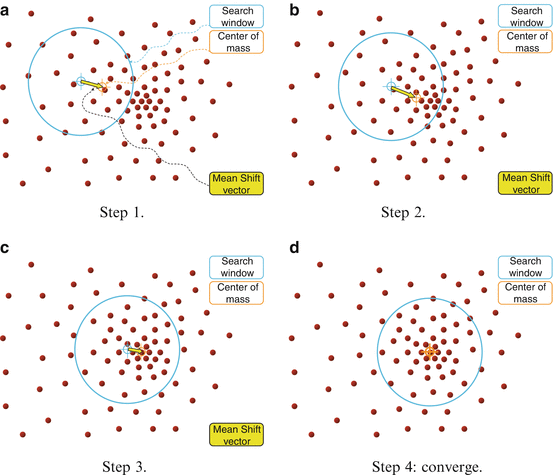

In [7]:
from IPython.display import Image
Image(filename="D:/Jupyter_space/mean_shift.GIF", width=800, height=800)

### 1.3 Density-Based Spatial Clustering of Applications with Noise

The main idea of DBSCAN is to find the regions of high density, so the key problem is how to define the density. For example, if we have a point $P$,  the density of $P$ is the number of points within a circle of radius $\epsilon$ and the points in this area are the neighborhood of $P$. According to the density of points, we could give the points different level.  
* Core Point: The density of the point is largere than $MinPits$.  
* Border Point: The density of the point is less than $MinPits$ however the point is in the neighborhood of a core point.  
* Noise point: The point is not a core point, nor a border point.  

The steps of DBSCAN could be represented like following.
1. Calculate the density of every point and difine core points.
2. Find the connected compopnents of core points, and here we should ignore all non-core points.  
3. Assign each non-core ponit to a nearby cluster within the radius $\epsilon$, otherwise define it as noise point.

### 1.4 Gaussian Mixture Models

GMM(Gaussian Mixture Models) is a function that is comporised of several Gaussian functions, each identified by $k \in \{1, 2, ..., K\}$, where K is the number of clusters in dataset. Each Gaussian function has following parameters:

Each Gaussian function has the following parameters:
* Mean $\mu_k$ defines the center of the Gaussian function.
* Covariance $\sigma_k$ defines the width of the Gaussian function.
* Mixing coefficient $\pi_k$ is the weight of every Gaussian funtion.

Every Gaussian function could be described using following equations:
$$ \mathcal{N}(x| \mu, \sigma) = \frac{1}{(2\pi)^{\frac{D}{2}}|\sigma|^{\frac{1}{2}}} exp(-\frac{1}{2}(x-\mu)^T \sigma^{-1} (x-\mu)) $$,
where D is the dimension of each data point.

The GMM model:
$$P(x) = \sum_{k=1}^{K} \pi_k \mathcal{N}(x|\mu_k, \sigma_k)$$

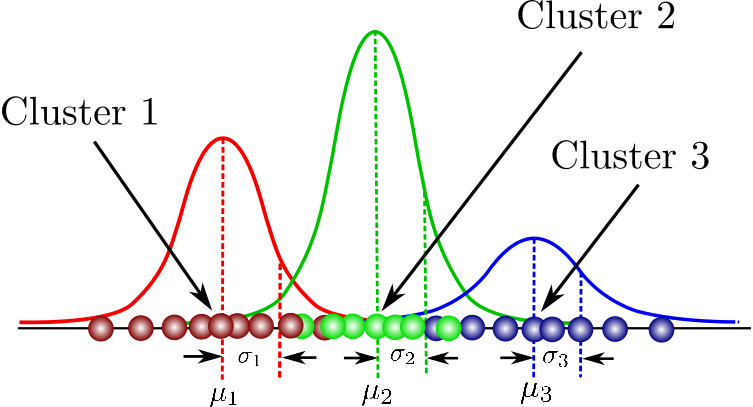

In [2]:
from IPython.display import Image
Image(filename="D:/Jupyter_space/GMM_1.png", width=800, height=800)

Taking the above figure as an example, we could see that there are three distributions. $\mu_k$ is the center of every distribution, $\sigma_k$ is the width, and $\pi_k$ is the height of every distribution.

Next, E-M (Expectaion Maximization) algorithm would be used to determin the paremeters of this model and parameters of the model include:
$$\theta = \{ \pi, \mu, \sigma \}$$
Steps of E-M algorithm:
1. Initialize $\theta$ accordingly. For instance, we could use the result obtained by k-means.
2. Expectaion step (evaluate): calculate $P(\textbf{z}|x, \theta)$.  
Here $\textbf{z} = \{z_1, z_2, ..., z_K \}$ and every element $z_k$ could be either 1 or 0. If $z_k = 1$, the data point $x$ is in the cluster $k$ and otherwise, $x$ is not. So $P(\textbf{z}|x, \theta)$ is the probability that the data point x belongs to which cluster based on given distribution.
3. Maximization. $\theta^{*} = arg \max_{\theta} \ \mathcal{Q} (\theta^{*}, \theta)$.  
$$\mathcal{Q} (\theta^{*}, \theta) = E[ln p(x, z| \theta^{*})]$$

## 2 Application

### 2.1 K- means
Here we will use the MNIST dataset to apply clustering algorithms that we introduced above. Firstly, we will import necessary libraries, functions and dataset.

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [6]:
digits = load_digits()
digits.data.shape

(1797, 64)

The MINIST dataset consists of 1794 images and the dimension of each image is $8\times8$.

In [39]:
kmeans = KMeans(n_clusters=10, random_state=4)
clusters = kmeans.fit_predict(digits.data)
print(clusters)

[2 4 4 ... 4 1 1]


Here we have want to cluster 10 groups, so we define the n_clusters as 10.

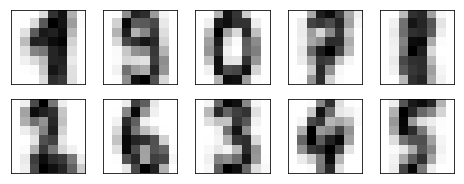

In [40]:
fig, ax = plt.subplots(2, 5, figsize=(8,3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

We could see that even though here labels is not available, we can still use k-means to cluster this dataset. However it is worthwhile to mention that the order of clusters is not correct, since k-means is an unsupervised algorithm.

In [41]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

After correct the order of lables, we could calculate the accuracy of k-means clustering with the dataset MNIST and plot the confusion matrix.

In [42]:
accuracy_score(digits.target, labels)

0.7929883138564274

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


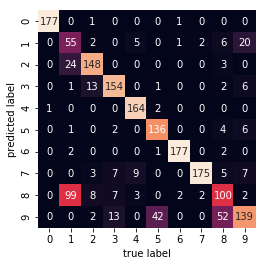

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [47]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, labels)

(1797, 2)


Then we try to visualize the projected data.

In [48]:
def plot_data(data, label):
    x_min, x_max = np.min(data, 0), np. max(data, 0)
    data = (data - x_min)/(x_max - x_min)
    
    fig = plt.figure
    ax = plt.subplot(111)
    for i in range(data.shape[0]):
        plt.text(data[i,0], data[i,1], str(label[i]),
                color=plt.cm.Set1(label[i]/10,))
    plt.xticks([])
    plt.yticks([])
    return fig

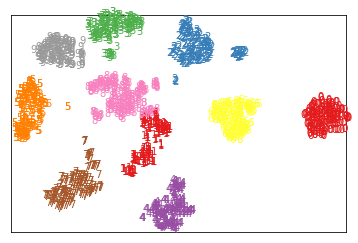

In [49]:
fig = plot_data(digits_proj, labels)
plt.show(fig)

### 2.2 Gaussian Mixture Models

In [21]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.mixture import GaussianMixture

# initilizer gaussian mixture model classifier
gmm = GaussianMixture(n_components=10, max_iter=200)
clusters = gmm.fit_predict(digits.data)

from scipy.stats import mode
# similarly, we also need to correct the order of label
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# calculate and print the accuracy
accuracy_score(digits.target, labels)

0.8096828046744574

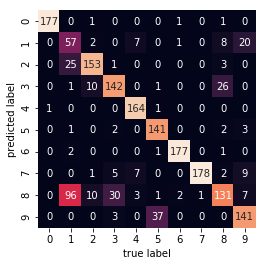

In [15]:
# calculate the confusion matrix and print it
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');